<a href="https://colab.research.google.com/github/koushik2299/Data-Science/blob/main/DS_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Understanding**

There are **2 Data files** which consists of **Sales of Used Cars** and **Sales of New Cars**

**Assumptions**

1. Assuming the both the data files belong to same dealer so that the customer id and vehicle id are same for both the data files

# Libraries and Functions

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
def unique(df):
 for col in df.columns:
  unique_values = df[col].explode().unique()
  typee = df[col].dtype
  if len(unique_values) > 50:
   print(f"{col} has {len(unique_values)} unique values")
  else:
    print(f"{col} contains: {', '.join(map(str, unique_values))}")

def missing(df):
  missing_count = df.isnull().sum()
  total_values = df.shape[0]
  missing_percentage = (missing_count / total_values) * 100
  missing_data_summary = pd.DataFrame({
      '\033[1mMissing Count\033[0m': missing_count,
      '\033[1mMissing Percentage\033[0m': missing_percentage
  })
  print(missing_data_summary)

def desc_cols(df):
  numeric_cols = df.columns[df.dtypes!='object']
  categorical_cols = df.columns[df.dtypes=='object']
  print("\033[1mNumber of Numerical Cols",len(numeric_cols),"\033[0m")
  print(list(numeric_cols))
  print('-'*85)
  print("\033[1mNumber of Catageroical Cols",len(categorical_cols),"\033[0m")
  print(list(categorical_cols))

In [144]:
#Loading the data
used_df = pd.read_excel("/content/data.xlsx",sheet_name=0)
new_df = pd.read_excel("/content/data.xlsx",sheet_name=1)

In [145]:
used_df.head()

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
0,2741953,243834,2018-01-28,C,IMPALA,Silver Ice Metallic,221599.28582525,0.064453,2018.0,73,SIL,F,75/01/28 00:00:00
1,2357269,243635,2017-12-27,D,MALIBU,Coppertino Metallic,14654.951754,0.064372,2018.0,88,BRO,F,95/02/12 00:00:00
2,1366119,262206,2019-08-28,G,TRAVERSE,Summit White,22436.110791,0.067584,2019.0,71,WHI,F,89/09/01 00:00:00
3,0,267485,2019-08-29,G,CREW-CAB,Summit White,30461.502246,0.000000,2020.0,39,WHI,F,84/03/20 00:00:00
4,482589,231904,2017-01-31,G,TAHOE,Black,30488.934677,0.060465,2017.0,84,BLA,M,98/10/02 00:00:00


In [146]:
new_df.head()

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,CUS_BIRTH_DATE,GENDER
0,504695,165288,1897-03-11,C,CAPRICE-X,Medium Adriatic Blue,1.299681e+04,0.033855,1996,38,75/01/28 00:00:00,F
1,517174,165248,1997-05-06,C,CAPRICE-X,Bright White,1.782787e+06,0.034412,1996,37,95/02/12 00:00:00,F
2,4591,165252,1997-01-29,C,CAPRICE-X,Dark Green Grey,1.094648e+04,0.000000,1996,9,89/09/01 00:00:00,F
3,513630,165409,1997-04-27,C,CAPRICE-X,Marblehead Grey,1.192797e+04,0.036173,1996,59,84/03/20 00:00:00,F
4,3116,165488,1997-01-11,C,CAPRICE-X,Dark Cherry,1.259339e+04,0.044325,1996,97,98/10/02 00:00:00,M


Creating a combined df

In [147]:
tdf = pd.concat([used_df,new_df],axis=0)
tdf.reset_index(inplace=True,drop=True)

In [148]:
tdf.head()

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
0,2741953,243834,2018-01-28,C,IMPALA,Silver Ice Metallic,221599.28582525,0.064453,2018.0,73,SIL,F,75/01/28 00:00:00
1,2357269,243635,2017-12-27,D,MALIBU,Coppertino Metallic,14654.951754,0.064372,2018.0,88,BRO,F,95/02/12 00:00:00
2,1366119,262206,2019-08-28,G,TRAVERSE,Summit White,22436.110791,0.067584,2019.0,71,WHI,F,89/09/01 00:00:00
3,0,267485,2019-08-29,G,CREW-CAB,Summit White,30461.502246,0.000000,2020.0,39,WHI,F,84/03/20 00:00:00
4,482589,231904,2017-01-31,G,TAHOE,Black,30488.934677,0.060465,2017.0,84,BLA,M,98/10/02 00:00:00


In [149]:
tdf.shape

(10084, 13)

In [150]:
df = tdf.copy()

In [151]:
df.shape

(10084, 13)

Seems Like there are few Unwanted Symbols in the dataset so lets remove them using Regx Expressions

In [152]:
unwanted_symbols = r'[^\d.]'  # Regular expression to match unwanted symbols
df['ACTUAL_PRICE'] = df['ACTUAL_PRICE'].replace(unwanted_symbols, '', regex=True)
# Regex is True means considereing the variable as representative of Regular expression not a regular variable so that we get access to all the funcanalities of
# the regular expressions.


In [153]:
df.head()

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
0,2741953,243834,2018-01-28,C,IMPALA,Silver Ice Metallic,221599.28582525,0.064453,2018.0,73,SIL,F,75/01/28 00:00:00
1,2357269,243635,2017-12-27,D,MALIBU,Coppertino Metallic,14654.951754,0.064372,2018.0,88,BRO,F,95/02/12 00:00:00
2,1366119,262206,2019-08-28,G,TRAVERSE,Summit White,22436.110791,0.067584,2019.0,71,WHI,F,89/09/01 00:00:00
3,0,267485,2019-08-29,G,CREW-CAB,Summit White,30461.502246,0.000000,2020.0,39,WHI,F,84/03/20 00:00:00
4,482589,231904,2017-01-31,G,TAHOE,Black,30488.934677,0.060465,2017.0,84,BLA,M,98/10/02 00:00:00


# Sales of Total Data **EDA**

In [154]:
tdf.head()

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
0,2741953,243834,2018-01-28,C,IMPALA,Silver Ice Metallic,221599.28582525,0.064453,2018.0,73,SIL,F,75/01/28 00:00:00
1,2357269,243635,2017-12-27,D,MALIBU,Coppertino Metallic,14654.951754,0.064372,2018.0,88,BRO,F,95/02/12 00:00:00
2,1366119,262206,2019-08-28,G,TRAVERSE,Summit White,22436.110791,0.067584,2019.0,71,WHI,F,89/09/01 00:00:00
3,0,267485,2019-08-29,G,CREW-CAB,Summit White,30461.502246,0.000000,2020.0,39,WHI,F,84/03/20 00:00:00
4,482589,231904,2017-01-31,G,TAHOE,Black,30488.934677,0.060465,2017.0,84,BLA,M,98/10/02 00:00:00


## Unique Values in the data

In [155]:
tdf['CUSTOMERID'].value_counts()

4591       712
0          613
578497     279
613        140
17         113
          ... 
574469       1
618457       1
438724       1
562819       1
1950544      1
Name: CUSTOMERID, Length: 5926, dtype: int64

In [156]:
tdf['VEHICLEID'].value_counts()

0          146
251791       2
241622       2
260741       2
258954       2
          ... 
191300       1
190866       1
186870       1
187631       1
1754101      1
Name: VEHICLEID, Length: 9913, dtype: int64

In [157]:
tdf['MODEL'].value_counts()

TAHOE       1606
CAPRICE     1391
LUMINA      1161
PICK-UP      728
BLAZER       525
            ... 
CATERA         2
VIEW           1
SIGNUM         1
COLORADO       1
PRINCE         1
Name: MODEL, Length: 76, dtype: int64

In [158]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10084 entries, 0 to 10083
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUSTOMERID        10084 non-null  int64  
 1   VEHICLEID         10084 non-null  int64  
 2   TRANSACTION_DATE  9414 non-null   object 
 3   BRAND             9932 non-null   object 
 4   MODEL             9932 non-null   object 
 5   COLOUR            9902 non-null   object 
 6   ACTUAL_PRICE      10077 non-null  object 
 7   DISCOUNTED RATIO  9908 non-null   float64
 8   MODELYR           9932 non-null   float64
 9   STORECODE         10084 non-null  int64  
 10  GENCO             2774 non-null   object 
 11  GENDER            9882 non-null   object 
 12  CUS_BIRTH_DATE    8808 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.0+ MB


The used cars data contains **13 features** and **10083 Observations**

Doing some Type Conversions to make the data workable

Actual Price Needs to be converted to Float

Date Columns need to be converted to Date Format

In [159]:
df[df['ACTUAL_PRICE']=='15.114.9461169']

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
2550,1011338,171611,2012-09-12,D,CAPTIVA,Smokey Eye Grey,15.114.9461169,0.063782,2012.0,51,GRY,M,NaN


In [160]:
df['ACTUAL_PRICE']=df['ACTUAL_PRICE'].apply(lambda x: str(x).replace('.', '', 1) if str(x).count('.') > 1 else str(x))

**"at"** is faster than loc or iloc and it is only used when we are accessing single element not set or slice of data.

In [161]:
df['ACTUAL_PRICE']

0           221599.28582525
1            14654.95175436
2            22436.11079067
3        30461.502246390002
4            30488.93467698
                ...        
10079    13947.884100000001
10080    23203.754100000002
10081              16375.77
10082             36026.694
10083           21853.10907
Name: ACTUAL_PRICE, Length: 10084, dtype: object

In [162]:
df['ACTUAL_PRICE']=df['ACTUAL_PRICE'].astype('float')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10084 entries, 0 to 10083
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUSTOMERID        10084 non-null  int64  
 1   VEHICLEID         10084 non-null  int64  
 2   TRANSACTION_DATE  9414 non-null   object 
 3   BRAND             9932 non-null   object 
 4   MODEL             9932 non-null   object 
 5   COLOUR            9902 non-null   object 
 6   ACTUAL_PRICE      10077 non-null  float64
 7   DISCOUNTED RATIO  9908 non-null   float64
 8   MODELYR           9932 non-null   float64
 9   STORECODE         10084 non-null  int64  
 10  GENCO             2774 non-null   object 
 11  GENDER            9882 non-null   object 
 12  CUS_BIRTH_DATE    8808 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 1.0+ MB


In [164]:
unique(df)

CUSTOMERID has 5926 unique values
VEHICLEID has 9913 unique values
TRANSACTION_DATE has 3044 unique values
BRAND contains: C, D, G, nan, T, K, H, E, M, O, A, B, S
MODEL has 77 unique values
COLOUR has 491 unique values
ACTUAL_PRICE has 6073 unique values
DISCOUNTED RATIO has 3130 unique values
MODELYR contains: 2018.0, 2019.0, 2020.0, 2017.0, nan, 2014.0, 2012.0, 2015.0, 2009.0, 2007.0, 2016.0, 2008.0, 2011.0, 1994.0, 20.0, 2010.0, 2013.0, 2006.0, 2005.0, 2001.0, 1996.0, 2002.0, 1997.0, 1993.0, 1998.0, 1999.0, 2000.0, 2003.0, 2004.0
STORECODE has 100 unique values
GENCO contains: SIL, BRO, WHI, BLA, GRY, BLU, GOL, nan, RED, PUR, MAR, YEL, GRN, BEI, ORA
GENDER contains: F, M, n?a, nan
CUS_BIRTH_DATE has 4543 unique values


In [165]:
df['GENDER']=df['GENDER'].apply(lambda x:"nan" if x == "n?a" else x)

## Duplicates in the Data

In [166]:
df.duplicated().sum()

0

Removing the Primary Keys and Checking for the Duplicates

In [167]:
df.drop(['CUSTOMERID','VEHICLEID'],axis=1,inplace=False).duplicated().sum()

0

By this we can clearly infer that There are **No Duplicates** in the Dataset

**Unique Values** accross the Dataset

## Missing Values in the Data

In [168]:
missing(df)

                  Missing Count  Missing Percentage
CUSTOMERID                            0                    0.000000
VEHICLEID                             0                    0.000000
TRANSACTION_DATE                    670                    6.644189
BRAND                               152                    1.507338
MODEL                               152                    1.507338
COLOUR                              182                    1.804839
ACTUAL_PRICE                          7                    0.069417
DISCOUNTED RATIO                    176                    1.745339
MODELYR                             152                    1.507338
STORECODE                             0                    0.000000
GENCO                              7310                   72.491075
GENDER                              202                    2.003173
CUS_BIRTH_DATE                     1276                   12.653709


As GENCO Column describes the color code lets impute that from the Color column which we have

In [169]:
df[df['BRAND'].isnull()]

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
15,0,252187,2019-05-19,NaN,NaN,NaN,0.0,NaN,NaN,37,NaN,F,NaN
42,0,212719,2019-05-19,NaN,NaN,NaN,0.0,NaN,NaN,53,NaN,M,90/08/05 00:00:00
53,0,211223,2019-05-19,NaN,NaN,NaN,0.0,NaN,NaN,68,NaN,M,2002-01-10 00:00:00
57,0,211221,2019-05-19,NaN,NaN,NaN,0.0,NaN,NaN,68,NaN,M,20/05/25 00:00:00
69,0,247911,2019-05-19,NaN,NaN,NaN,0.0,NaN,NaN,47,NaN,M,83/10/01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,0,258034,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,F,94/08/20 00:00:00
2861,0,182439,NaN,NaN,NaN,NaN,0.0,NaN,NaN,20,NaN,F,87/04/09 00:00:00
2862,0,182440,NaN,NaN,NaN,NaN,0.0,NaN,NaN,50,NaN,F,79/10/05 00:00:00
2865,0,216709,NaN,NaN,NaN,NaN,0.0,NaN,NaN,27,NaN,M,85/09/17 00:00:00


In [139]:
df[df['BRAND'].isnull()].isnull().sum()

CUSTOMERID            0
VEHICLEID             0
TRANSACTION_DATE    143
BRAND               152
MODEL               152
COLOUR              152
ACTUAL_PRICE          0
DISCOUNTED RATIO    152
MODELYR             152
STORECODE             0
GENCO               152
GENDER                4
CUS_BIRTH_DATE       12
dtype: int64

These 152 Observations seems add no value to the data so lets delete them because the main the features seems empty.

In [170]:
df_v2 = df.copy()

In [171]:
df = df.dropna(subset='BRAND')

In [172]:
missing(df)

                  Missing Count  Missing Percentage
CUSTOMERID                            0                    0.000000
VEHICLEID                             0                    0.000000
TRANSACTION_DATE                    527                    5.306081
BRAND                                 0                    0.000000
MODEL                                 0                    0.000000
COLOUR                               30                    0.302054
ACTUAL_PRICE                          7                    0.070479
DISCOUNTED RATIO                     24                    0.241643
MODELYR                               0                    0.000000
STORECODE                             0                    0.000000
GENCO                              7158                   72.070077
GENDER                              198                    1.993556
CUS_BIRTH_DATE                     1264                   12.726540


In [174]:
df.shape

(9932, 13)

In [173]:
df[df['ACTUAL_PRICE'].isna()]

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
5370,578497,479306,2003-06-08,H,CAPRICE,Botanica Dark Blue,NaN,-0.003117,2003.0,99,NaN,M,76/08/31 00:00:00
5722,578497,519921,2003-10-20,H,LUMINA,WHITE,NaN,0.000000,2004.0,88,NaN,F,NaN
6298,1167105,461195,2003-03-11,G,BLAZER,Summit White,NaN,0.030909,2003.0,74,NaN,M,94/06/16 00:00:00
6567,1058372,417133,2002-06-17,H,LUMINA,Delft Blue,NaN,0.000000,2002.0,92,NaN,M,82/04/06 00:00:00
6919,1364604,576370,2004-09-08,G,BLAZER,Silver Green Metalli,NaN,0.000000,2004.0,55,NaN,M,NaN
7143,1264275,522081,2004-01-05,G,TAHOE,Dark Grey,NaN,0.000000,2004.0,8,NaN,M,74/06/13 00:00:01
7367,17,532792,2004-01-03,G,BLAZER,Silverstone Metallic,NaN,0.000000,2004.0,96,NaN,F,NaN


In [27]:
contingency_table = pd.crosstab(df['COLOUR'], df['GENCO'], margins=True)
print(contingency_table)

GENCO                       BEI  BLA  BLU  BRO  GOL  GRN  GRY  MAR  ORA  PUR  \
COLOUR                                                                         
Abalone White                 0    0    0    0    0    0    0    0    0    0   
Agate Red Metallic            0    0    0    0    0    0    0    0    0    0   
Alto Grey Metallic            0    0    0    0    0    0    1    0    0    0   
Aqua                          0    0    1    0    0    0    0    0    0    0   
Atlantis Blue Metallic        0    0    1    0    0    0    0    0    0    0   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Watkins Glen Gray Metallic    0    0    0    0    0    0    8    0    0    0   
White                         0    0    0    0    0    0    0    0    0    0   
White Diamond                 0    0    0    0    0    0    0    0    0    0   
White Pearl Mica              0    0    0    0    0    0    0    0    0    0   
All                           6  572  15

In [28]:
# Calculate the percentage of Category and Code
outlet_type_size_pct = contingency_table.div(contingency_table['All'], axis=0).iloc[:-1, :-1]

# Print the percentage table
print(outlet_type_size_pct)


GENCO                       BEI  BLA  BLU  BRO  GOL  GRN  GRY  MAR  ORA  PUR  \
COLOUR                                                                         
Abalone White               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Agate Red Metallic          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Alto Grey Metallic          0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
Aqua                        0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Atlantis Blue Metallic      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Victory Red                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Watkins Glen Gray Metallic  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
White                       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
White Diamond               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
White Pearl Mica            0.0  0.0  0.

So based on the table we can use this to impute the values into the GENCO column for our intrepetation.

In [29]:
for idx, row in df[df['GENCO'].isnull()].iterrows():
    colour = row['COLOUR']

    if not pd.isnull(colour):
        if colour in outlet_type_size_pct.index:
            genco = outlet_type_size_pct.loc[colour].idxmax()
            df.loc[idx, 'GENCO'] = genco

In [30]:
df.groupby('VEHICLEID')['ACTUAL_PRICE'].mean()

VEHICLEID
0          11069.902759
6935           0.000000
13574          0.000000
18414          0.000000
20065          0.000000
               ...     
1867887    14886.286920
1870480    20667.645720
1940337     8049.758940
1945308    12076.062390
1945427    10449.877230
Name: ACTUAL_PRICE, Length: 9913, dtype: float64

In [31]:
df['ACTUAL_PRICE'] = df.groupby('MODEL')['ACTUAL_PRICE'].transform(lambda x: x.fillna(x.mean()))

In [32]:
df[df['ACTUAL_PRICE'].isnull()]

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
15,0,252187,2019-05-19,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,F,NaN
42,0,212719,2019-05-19,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,M,90/08/05 00:00:00
53,0,211223,2019-05-19,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,M,2002-01-10 00:00:00
57,0,211221,2019-05-19,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,M,20/05/25 00:00:00
69,0,247911,2019-05-19,NaN,NaN,NaN,NaN,NaN,NaN,47,NaN,M,83/10/01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,0,258034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,F,94/08/20 00:00:00
2861,0,182439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,F,87/04/09 00:00:00
2862,0,182440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,F,79/10/05 00:00:00
2865,0,216709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,M,85/09/17 00:00:00


In [33]:
df[df['VEHICLEID']==519921]

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
5722,578497,519921,2003-10-20,H,LUMINA,WHITE,7651.740873,0.0,2004.0,88,NaN,F,NaN


In [34]:
missing(df)

                  Missing Count  Missing Percentage
CUSTOMERID                            0                    0.000000
VEHICLEID                             0                    0.000000
TRANSACTION_DATE                    670                    6.644189
BRAND                               152                    1.507338
MODEL                               152                    1.507338
COLOUR                              182                    1.804839
ACTUAL_PRICE                        152                    1.507338
DISCOUNTED RATIO                    176                    1.745339
MODELYR                             152                    1.507338
STORECODE                             0                    0.000000
GENCO                              4549                   45.111067
GENDER                              202                    2.003173
CUS_BIRTH_DATE                     1276                   12.653709


In [35]:
df.shape

(10084, 13)

In [36]:
len(df['CUSTOMERID'].unique())

5926

Based on this we can infer the following things

1. Number of Observations are 10,084 and number of customers are 5,926 so based on this we can infer we do have **repeated customers**

2. Most of the **GENCO are missing**

In [37]:
desc_cols(df)

Number of Numerical Cols 6 
['CUSTOMERID', 'VEHICLEID', 'ACTUAL_PRICE', 'DISCOUNTED RATIO', 'MODELYR', 'STORECODE']
-------------------------------------------------------------------------------------
Number of Catageroical Cols 7 
['TRANSACTION_DATE', 'BRAND', 'MODEL', 'COLOUR', 'GENCO', 'GENDER', 'CUS_BIRTH_DATE']


In [38]:
a=df['ACTUAL_PRICE']

So there are clearly outliers in our dataset

In [39]:
a.isnull().sum()

152

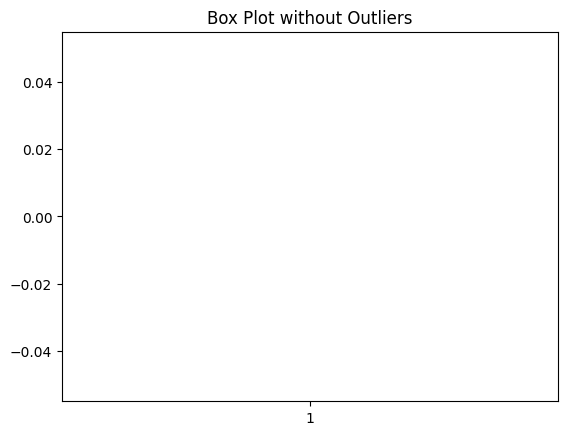

In [40]:
plt.boxplot(a)
plt.title("Box Plot without Outliers")
plt.show()

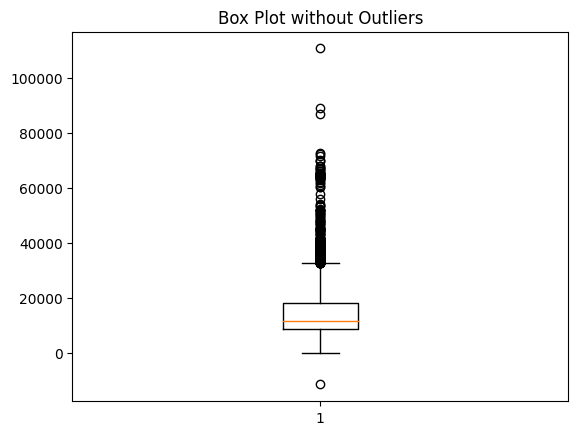

In [41]:
plt.boxplot(df[df['ACTUAL_PRICE']<=150000]['ACTUAL_PRICE'])
plt.title("Box Plot without Outliers")
plt.show()

In [42]:
outliers=df[df['ACTUAL_PRICE']>150000]
print(f"Number of Outliers: {outliers.shape[0]}")
print("------------------------------------------------------------------")
print(outliers)

Number of Outliers: 12
------------------------------------------------------------------
      CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND         MODEL  \
0        2741953     243834       2018-01-28     C        IMPALA   
546       667093     255154       2019-01-30     G       EQUINOX   
1370      947993     242052       2017-12-13     T  Trail Blazer   
1723     2081113     175989       2012-09-29     K      ESCALADE   
2828     3064362     254860       2019-01-31     G         TAHOE   
2953           0     268668              NaN     G         TAHOE   
2957      517174     165248       1997-05-06     C     CAPRICE-X   
3344      303649     199601       1997-05-14     G         TAHOE   
5178      691979     413464       2002-03-26     H       CAPRICE   
7366     1229949     533581       2004-01-17     H       CAPRICE   
9189     3422638    1553890       2014-06-18     G         TAHOE   
9795     3622181    1733189       2015-08-15     K           SRX   

                         

##    Anomolies of the Used Cars Sales Data

1. There are Typos in Actual Price, Gender which need to be fixed
2. The dataset has 12 Outliers  
2. 22% of Transaction Dates are missing


# Indicators need to be calculated

Average Customer Spending

Average Transaction Per Customer

Average Car Price



In [43]:
df.head()

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
0,2741953,243834,2018-01-28,C,IMPALA,Silver Ice Metallic,221599.285825,0.064453,2018.0,73,SIL,F,75/01/28 00:00:00
1,2357269,243635,2017-12-27,D,MALIBU,Coppertino Metallic,14654.951754,0.064372,2018.0,88,BRO,F,95/02/12 00:00:00
2,1366119,262206,2019-08-28,G,TRAVERSE,Summit White,22436.110791,0.067584,2019.0,71,WHI,F,89/09/01 00:00:00
3,0,267485,2019-08-29,G,CREW-CAB,Summit White,30461.502246,0.000000,2020.0,39,WHI,F,84/03/20 00:00:00
4,482589,231904,2017-01-31,G,TAHOE,Black,30488.934677,0.060465,2017.0,84,BLA,M,98/10/02 00:00:00


This is Average Spending of each Customer

In [44]:
def avg_cust_spending(df):
  print(df.groupby('CUSTOMERID').ACTUAL_PRICE.agg('mean'))

Number of Transactions by Each Customer

In [45]:
def no_of_trans(df):
  print(df.groupby('CUSTOMERID')['TRANSACTION_DATE'].count().sort_values(ascending=False))

In [46]:
def avgprice(df):
  print(df['ACTUAL_PRICE'].agg('mean'))

Average Price of Each Model

In [47]:
df.groupby('MODEL').ACTUAL_PRICE.agg('mean').sort_values(ascending=False)

MODEL
ESCALADE    50537.777660
CT6         43639.493098
CORVETTE    43155.350052
XTS         38126.893232
BOLT EV     36848.515878
                ...     
LANOS        3758.443737
ROCSTA       3665.680515
TOWNER       3519.603900
TOPLAND      3167.098126
MATIZ        3015.611161
Name: ACTUAL_PRICE, Length: 76, dtype: float64

## Total

In [51]:
#Average Customer Spending
avg_cust_spending(df)

CUSTOMERID
0          24680.735035
17          9156.979663
25          8888.008500
78          8638.898302
286        17108.051715
               ...     
3813098    14168.601000
3813751    22432.668930
3823919    14886.286920
3826950    16176.412800
3827363    11669.088906
Name: ACTUAL_PRICE, Length: 5926, dtype: float64


In [50]:
#Average Transaction of the Customers
no_of_trans(df)

CUSTOMERID
4591       712
578497     279
613        140
17         113
2590218     94
          ... 
3132878      0
514915       0
3162701      0
2755969      0
3189811      0
Name: TRANSACTION_DATE, Length: 5926, dtype: int64


In [49]:
#Average Price of the Cars
avgprice(df)

15953.227218040654


## Car Model

In [59]:
df.head(2)

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
0,2741953,243834,2018-01-28,C,IMPALA,Silver Ice Metallic,221599.285825,0.064453,2018.0,73,SIL,F,75/01/28 00:00:00
1,2357269,243635,2017-12-27,D,MALIBU,Coppertino Metallic,14654.951754,0.064372,2018.0,88,BRO,F,95/02/12 00:00:00


In [58]:
#Average Customer Spending
df.groupby(['MODEL','CUSTOMERID']).ACTUAL_PRICE.agg('mean')

MODEL  CUSTOMERID
9-3    305435        10047.175686
       729217        13238.495711
       888316        12882.462264
       1235645        9956.781436
       1277919        9896.661000
                         ...     
tahoe  707591        34031.856108
       742285        35639.291306
       1230294       32627.263044
       1441735       36225.598385
       2850962       31219.801772
Name: ACTUAL_PRICE, Length: 6327, dtype: float64

In [63]:
#Average Transaction Per Customer
df.groupby(['MODEL','CUSTOMERID']).ACTUAL_PRICE.agg('count')

MODEL  CUSTOMERID
9-3    305435        1
       729217        2
       888316        1
       1235645       1
       1277919       1
                    ..
tahoe  707591        1
       742285        1
       1230294       1
       1441735       1
       2850962       1
Name: ACTUAL_PRICE, Length: 6327, dtype: int64

In [64]:
#Average Car Price
df.groupby(['MODEL']).ACTUAL_PRICE.agg('mean')

MODEL
9-3          11403.116701
9-5          13833.977092
ASTRA         5440.360558
ATS          26925.804168
AVALANCHE    18641.237169
                 ...     
XLR          32463.219650
XT4          30283.271231
XT5          34231.672754
XTS          38126.893232
tahoe        35425.395271
Name: ACTUAL_PRICE, Length: 76, dtype: float64

## Gender

In [74]:
#Average Customer Spending
df.groupby(['GENDER','CUSTOMERID']).ACTUAL_PRICE.agg('mean')

GENDER  CUSTOMERID
F       0             24554.820688
        17             9265.171931
        25             8891.964000
        78             8673.462180
        286           15478.662600
                          ...     
nan     3570072       10400.037930
        3606794       18504.620100
        3618031       16573.703220
        3669760       17171.774820
        3764354       11168.987130
Name: ACTUAL_PRICE, Length: 6085, dtype: float64

In [75]:
#Average Transaction Per Customer
df.groupby(['GENDER','CUSTOMERID']).ACTUAL_PRICE.agg('count')

GENDER  CUSTOMERID
F       0             195
        17             48
        25             18
        78             14
        286             1
                     ... 
nan     3570072         1
        3606794         1
        3618031         1
        3669760         1
        3764354         1
Name: ACTUAL_PRICE, Length: 6085, dtype: int64

In [76]:
#Average Car Price
df.groupby(['GENDER','MODEL']).ACTUAL_PRICE.agg('mean')

GENDER  MODEL       
F       9-3             10259.263267
        9-5             11292.184184
        ASTRA            5293.971131
        ATS             26414.820477
        AVALANCHE       19431.266335
                            ...     
nan     Trail Blazer    16333.276592
        UPLANDER         9695.167830
        VENTURE          9476.586900
        XT4             35706.947292
        XT5             35612.019968
Name: ACTUAL_PRICE, Length: 183, dtype: float64

## AGE Group

In [77]:
df.head(2)

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
0,2741953,243834,2018-01-28,C,IMPALA,Silver Ice Metallic,221599.285825,0.064453,2018.0,73,SIL,F,75/01/28 00:00:00
1,2357269,243635,2017-12-27,D,MALIBU,Coppertino Metallic,14654.951754,0.064372,2018.0,88,BRO,F,95/02/12 00:00:00


In [85]:
"koushik"[:2]

'ko'

In [99]:
df['CUS_BIRTH_DATE'][:][1][:2]

'95'

In [80]:
pd.to_datetime(df['CUS_BIRTH_DATE'])

ParserError: ignored

In [ ]:
#Average Customer Spending
df.groupby(['GENDER','CUSTOMERID']).ACTUAL_PRICE.agg('mean')

GENDER  CUSTOMERID
F       0             24554.820688
        17             9265.171931
        25             8891.964000
        78             8673.462180
        286           15478.662600
                          ...     
nan     3570072       10400.037930
        3606794       18504.620100
        3618031       16573.703220
        3669760       17171.774820
        3764354       11168.987130
Name: ACTUAL_PRICE, Length: 6085, dtype: float64

In [ ]:
#Average Transaction Per Customer
df.groupby(['GENDER','CUSTOMERID']).ACTUAL_PRICE.agg('count')

GENDER  CUSTOMERID
F       0             195
        17             48
        25             18
        78             14
        286             1
                     ... 
nan     3570072         1
        3606794         1
        3618031         1
        3669760         1
        3764354         1
Name: ACTUAL_PRICE, Length: 6085, dtype: int64

In [ ]:
#Average Car Price
df.groupby(['GENDER','MODEL']).ACTUAL_PRICE.agg('mean')

GENDER  MODEL       
F       9-3             10259.263267
        9-5             11292.184184
        ASTRA            5293.971131
        ATS             26414.820477
        AVALANCHE       19431.266335
                            ...     
nan     Trail Blazer    16333.276592
        UPLANDER         9695.167830
        VENTURE          9476.586900
        XT4             35706.947292
        XT5             35612.019968
Name: ACTUAL_PRICE, Length: 183, dtype: float64